# House price prediction

### Import Section

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing


## Load The Dataset

In [26]:
data=fetch_california_housing()


In [27]:
print(data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

#### Indipendent data set

In [28]:
df=pd.DataFrame(data=data.data,columns=data.feature_names)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


#### Dependent dataset

In [29]:
df['Target']=data.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### EDA(Explarative data analysys)

In [33]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


## Data pre processing

In [34]:
## feature engineering
from geopy.geocoders import Nominatim

In [45]:
geolocator=Nominatim(user_agent='geoapiExercises')
# geolocator.reverse(f"{37.88}, {-122.23}")
geolocator.reverse("37.88, -122.23").raw["address"]

{'leisure': 'Ecological Study Area',
 'road': 'Centennial Drive',
 'neighbourhood': 'La Loma Park',
 'city': 'Oakland',
 'county': 'Alameda County',
 'state': 'California',
 'ISO3166-2-lvl4': 'US-CA',
 'postcode': '94720',
 'country': 'United States',
 'country_code': 'us'}

In [50]:
import pickle
# from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="geoapiExercises")
loc_update = {"County": [], "road": [], "neighbourhood": []}

def location(cord):
    latitude = str(cord[0])
    longitude = str(cord[1])
    loc = geolocator.reverse(f"{latitude}, {longitude}").raw.get("address", {})

    # Handling missing values
    loc_update['road'].append(loc.get('road', None))
    loc_update['County'].append(loc.get('county', None))
    loc_update['neighbourhood'].append(loc.get('neighbourhood', None))




In [59]:

for i, cord in enumerate(df.iloc[:200, 6:-1].values):
    location(cord)
    pickle.dump(loc_update, open('loc_update.pickle', 'wb'))

    if i % 100 == 0:
        print(i)


0
100


In [60]:
import pickle
loc_update=pickle.load(open("loc_update.pickle","rb"))

In [61]:
loc=pd.DataFrame(loc_update)

In [63]:
loc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3696 entries, 0 to 3695
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   County         3694 non-null   object
 1   road           3429 non-null   object
 2   neighbourhood  698 non-null    object
dtypes: object(3)
memory usage: 86.8+ KB


## Training and Testing

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load the California housing dataset
housing_data = fetch_california_housing()
X = pd.DataFrame(housing_data.data, columns=housing_data.feature_names)
y = pd.Series(housing_data.target, name="Target")

# Add AveBedrms to the DataFrame (for the missing feature)
X['AveBedrms'] = X['AveRooms'] / 2  # Example calculation to estimate bedrooms from rooms

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Prediction with Custom data

In [81]:

# Function to predict house price based on custom input
def predict_house_price(input_features):
    # Ensure input is in the correct shape (should have 8 features)
    input_array = np.array(input_features).reshape(1, -1)
    predicted_price = model.predict(input_array)
    return predicted_price[0]

# Example: Custom input values (replace with your own values)
custom_input = [8.5, 20, 6.5, 3.2, 1000, 1.5, 34.05, -118.25]  # Replace with actual values
predicted_price = predict_house_price(custom_input)

print(f"Predicted house price: ${predicted_price * 100000:.2f}")

Predicted house price: $384641.59


C:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [82]:
print(f"Predicted house price: ${abs(predicted_price) * 100000:.2f}")

Predicted house price: $384641.59


## Visualizatio

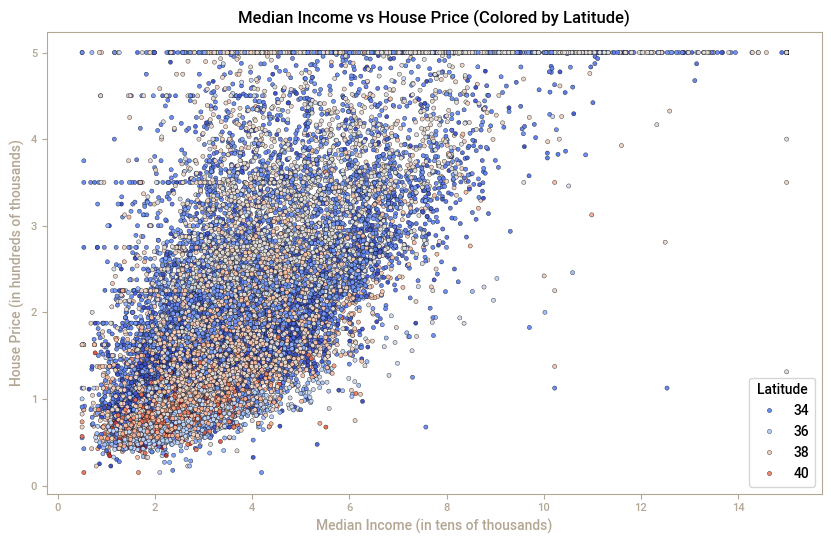

In [90]:
# 1. Scatter Plot: Median Income vs House Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X['MedInc'], y=y, hue=X['Latitude'], palette='coolwarm', edgecolor='k')
plt.title('Median Income vs House Price (Colored by Latitude)')
plt.xlabel('Median Income (in tens of thousands)')
plt.ylabel('House Price (in hundreds of thousands)')
# plt.colorbar(label='Latitude')
plt.show()

# 2. Geography Plot: Scatter plot of Latitude and Longitude with House Prices


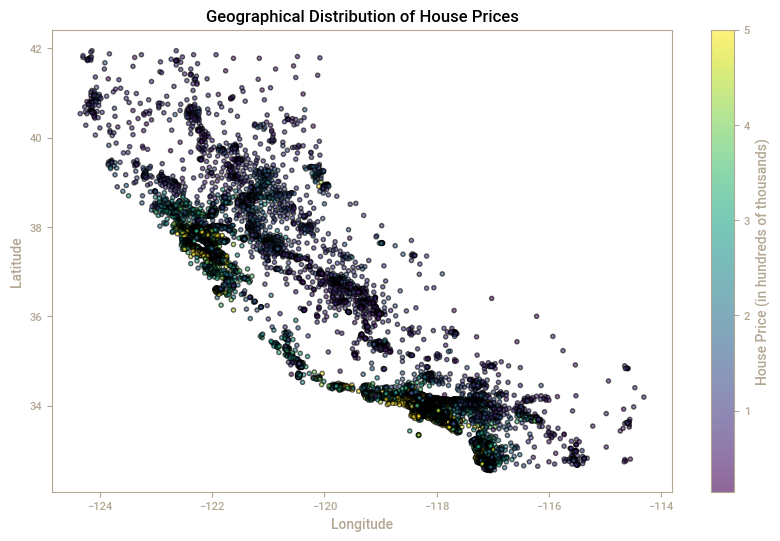

In [89]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X['Longitude'], X['Latitude'], c=y, cmap='viridis', edgecolor='k', alpha=0.6)
# Pass the scatter plot to colorbar
plt.colorbar(scatter, label='House Price (in hundreds of thousands)')
plt.title('Geographical Distribution of House Prices')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()